In [19]:
# Importing Libraries:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import   (StandardScaler, 
                                   LabelEncoder)  

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score ,
                            recall_score,
                            confusion_matrix, 
                            precision_score,
                            f1_score, 
                            accuracy_score,
                            classification_report,
                            roc_curve,
                            roc_auc_score,
                            auc)
from sklearn.ensemble import (RandomForestClassifier,
                           GradientBoostingClassifier )

from xgboost import XGBClassifier
                            


import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
warnings.filterwarnings('ignore')
from helpers.helper import plot_roc_auc, plot_confusion_matrix

In [2]:
DATA_PATH = "../Data"

# Data Preparation:

In [3]:
df = pd.read_csv(os.path.join(DATA_PATH, "Telco-Customer-Churn.csv"))
df.shape

(7043, 21)

In [4]:
# removing unnecessary features
cols_to_drop = ['gender', 'PhoneService', 'TotalCharges', 'customerID']

In [5]:
# Normalize Features:
# secondly, we normalize features
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': "No"})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': "No"})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': "No"})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': "No"})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': "No"})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': "No"})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': "No"})
df['InternetService'] = df['InternetService'].replace({0: "No"})



In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print('\n')
    print(f"{col} unique values are:\n")
    print(df[col].unique())
    print("***"*10)




customerID unique values are:

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
******************************


gender unique values are:

['Female' 'Male']
******************************


Partner unique values are:

['Yes' 'No']
******************************


Dependents unique values are:

['No' 'Yes']
******************************


PhoneService unique values are:

['No' 'Yes']
******************************


MultipleLines unique values are:

['No' 'Yes']
******************************


InternetService unique values are:

['DSL' 'Fiber optic' 'No']
******************************


OnlineSecurity unique values are:

['No' 'Yes']
******************************


OnlineBackup unique values are:

['Yes' 'No']
******************************


DeviceProtection unique values are:

['No' 'Yes']
******************************


TechSupport unique values are:

['No' 'Yes']
******************************


StreamingTV unique values are:

['No' 'Yes']

In [7]:
# Select Yes/No columns (object type with only Yes/No values)
yes_no_cols = ['Partner', 'Dependents', 'PhoneService','MultipleLines','OnlineSecurity',
               'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'Churn' ]

# Replace Yes -> 1, No -> 0
df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [8]:
X = df.drop(columns=['Churn']+ cols_to_drop)
y= df['Churn'].values

# Data Splitting:

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify= y)

X_train.shape, X_test.shape


((4930, 16), (2113, 16))

# Data Transformation

In [10]:
numerical_cols =['MonthlyCharges', 'tenure']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [11]:
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
label_encoder = LabelEncoder()
# we need to encode categorical feature foe logistic regression only
X_train_cp = X_train.copy()
X_test_cp = X_test.copy()
for col in cat_cols:

    X_train_cp[col] = label_encoder.fit_transform(X_train_cp[col])
    X_test_cp[col] = label_encoder.transform(X_test_cp[col] )



# Modeling:

## Logistic Regression:

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train_cp, y_train)
y_pred = log_reg.predict(X_test_cp )
y_proba = log_reg.predict_proba(X_test_cp)[:,1]

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7931850449597728

Confusion Matrix:
 [[1378  174]
 [ 263  298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



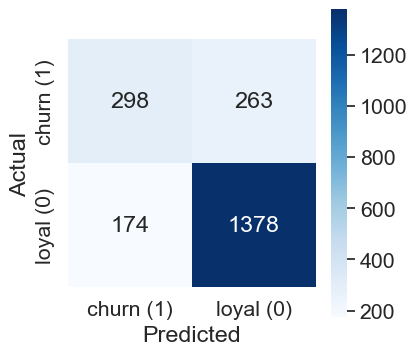

In [16]:
plot_confusion_matrix(y_test, y_pred)

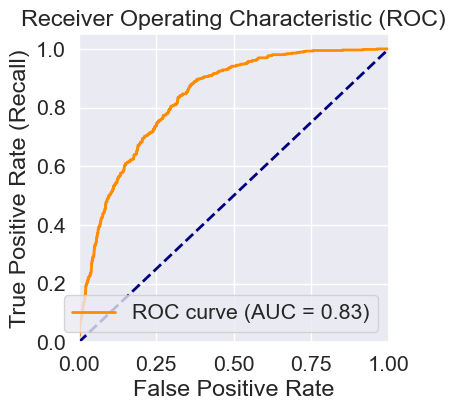

In [17]:
plot_roc_auc(y_test, y_proba)

## Random Forest:

In [22]:
random_forest= RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)


In [25]:
random_forest.fit(X_train_cp, y_train)
rf_y_pred = random_forest.predict(X_test_cp)
rf_y_proba = random_forest.predict_proba(X_test_cp)

In [26]:
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.7983909133932797

Confusion Matrix:
 [[1434  118]
 [ 308  253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1552
           1       0.68      0.45      0.54       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



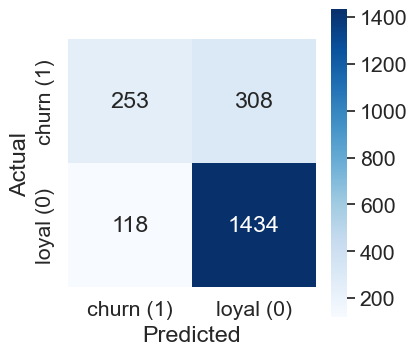

In [27]:
plot_confusion_matrix(y_test, rf_y_pred)

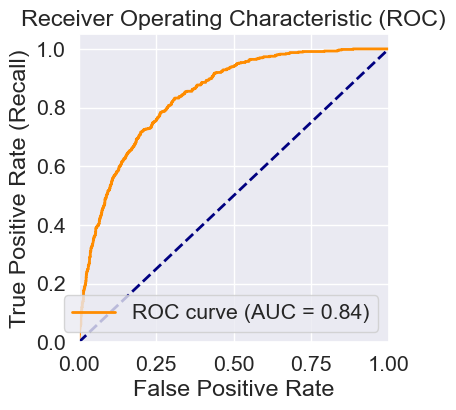

In [29]:
plot_roc_auc(y_test, rf_y_proba[:,1])

## XGBoost:

In [30]:
xgb = XGBClassifier()
xgb.fit(X_train_cp, y_train)
xgb_y_pred = xgb.predict(X_test_cp)
xgb_y_proba = xgb.predict_proba(X_test_cp)[:,1]

In [31]:
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_y_pred))

Accuracy: 0.7709417889256981

Confusion Matrix:
 [[1356  196]
 [ 288  273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1552
           1       0.58      0.49      0.53       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



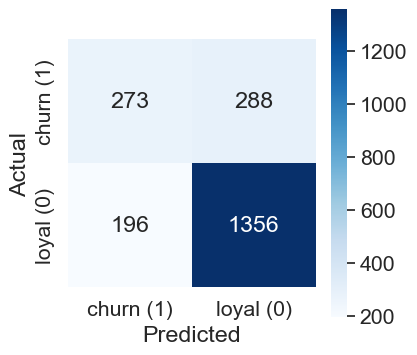

In [32]:
plot_confusion_matrix(y_test, xgb_y_pred)

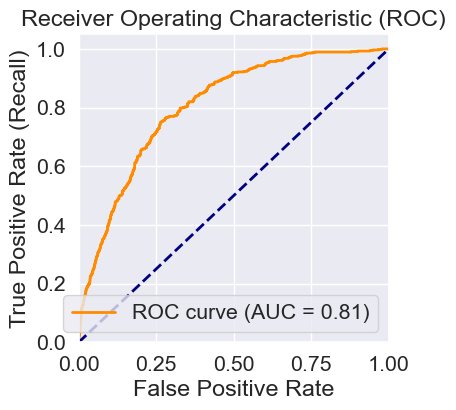

In [33]:
plot_roc_auc(y_test, xgb_y_proba)